In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import cbtk.kegg as kegg_api
plt.rcParams['font.family'] = 'Arial'


In [2]:
#df = pd.read_csv("../data/pterinCounts.26Oct2022.csv",index_col=0)
df = pd.read_csv("../data/pterinCounts.12Nov2022.csv",index_col=0)
df = df.drop("total_genes",axis=1)
df['genome'] = df['genome'].apply(lambda x: x.split('_protein')[0])

In [7]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict
0,GB_GCA_014654065.1,0,773,{}
1,GB_GCA_002479145.1,0,722,{}
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000..."
3,GB_GCA_903829855.1,0,886,{}
4,GB_GCA_002923395.1,0,284,{}
...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{}
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'}
65700,RS_GCF_001953955.1,0,959,{}
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01..."


In [3]:
google_sheet = 'https://docs.google.com/spreadsheets/d/1WjqoaGkUAWqmktBSK3kuq_SeBeLk-PwOJqBHa5Cvizk/export?gid=0&format=csv'
mwpterins = pd.read_csv(google_sheet)
pterin_ko = [x.split(',') for x in mwpterins['KO (pterin domain)'].dropna().tolist()]
mo_pterin = list(set([item for sublist in pterin_ko for item in sublist]))

In [4]:
mpterins = mwpterins[mwpterins['Pterin'].apply(lambda x: 'Mo' in str(x))]
wpterins = mwpterins[mwpterins['Pterin'].apply(lambda x: 'W' in str(x))]

mo_genes = [x.split(',') for x in mpterins['KO (pterin domain)'].dropna().tolist()]
mo_genes = list(set([item for sublist in mo_genes for item in sublist]))

w_genes = [x.split(',') for x in wpterins['KO (pterin domain)'].dropna().tolist()]
w_genes = list(set([item for sublist in w_genes for item in sublist]))



In [5]:
len(mo_genes)

39

In [6]:
len(w_genes)

5

In [7]:
num_mo_genes = []
num_w_genes = []
for idx,row in df.iterrows():
    gene_list = [x[1] for x in eval(row.gene_dict).items()]
    #gl = [x for x in gene_list if x not in ['K11389','K03738']]
    #gl2 = [x for x in gene_list if x in ['K11389','K03738']]
    gl = [x for x in gene_list if x in mo_genes]
    gl2 = [x for x in gene_list if x in w_genes]
    num_mo_genes.append(len(gl))
    num_w_genes.append(len(gl2))
    
df['mo_genes'] = num_mo_genes
df['w_genes'] = num_w_genes

In [9]:
df['w_gene_fraction'] =df.w_genes / df.total_annot_genes
df['mo_gene_fraction'] =df.mo_genes / df.total_annot_genes

In [10]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict,mo_genes,w_genes,w_gene_fraction,mo_gene_fraction
0,GB_GCA_014654065.1,0,773,{},0,0,0.0,0.000000
1,GB_GCA_002479145.1,0,722,{},0,0,0.0,0.000000
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000...",5,0,0.0,0.002009
3,GB_GCA_903829855.1,0,886,{},0,0,0.0,0.000000
4,GB_GCA_002923395.1,0,284,{},0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{},0,0,0.0,0.000000
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'},1,0,0.0,0.000351
65700,RS_GCF_001953955.1,0,959,{},0,0,0.0,0.000000
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01...",3,0,0.0,0.000697


In [11]:
metadata = pd.read_csv("../data/taxa/Mark_Westoby_Organism_Metadata_Export_02152018.txt",sep='\t')

/var/folders/17/58pxvfhj0gb_wz2nzgrzc6pc0000gn/T/ipykernel_32960/407774959.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("../data/taxa/Mark_Westoby_Organism_Metadata_Export_02152018.txt",sep='\t')


In [13]:
# get ncbi taxa ids for gtdb genomes

# DOWNLOAD data from GTDB FTP server here: https://data.gtdb.ecogenomic.org/releases/release207/207.0/

archaea = pd.read_csv("../data/taxa/ar53_metadata_r207.tsv",sep='\t')
archaea = archaea[['accession','ncbi_taxid']]

bacteria = pd.read_csv("../data/taxa/bac120_metadata_r207.tsv",sep='\t')
bacteria = bacteria[['accession','ncbi_taxid']]

archaea['domain'] = "Archaea"
bacteria['domain'] = "Bacteria"

gtdb_to_ncbi = pd.concat([archaea,bacteria],axis=0)

/var/folders/17/58pxvfhj0gb_wz2nzgrzc6pc0000gn/T/ipykernel_16550/2645816966.py:5: DtypeWarning: Columns (61,65,74,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  bacteria = pd.read_csv("../data/taxa/bac120_metadata_r207.tsv",sep='\t')


In [24]:
df

,genome,mopterin_genes,total_annot_genes,gene_dict,mo_genes,w_genes,w_gene_fraction,mo_gene_fraction,ncbi_taxid,domain
0,GB_GCA_014654065.1,0,773,{},0,0,0.0,0.000000,NaN,NaN
1,GB_GCA_002479145.1,0,722,{},0,0,0.0,0.000000,NaN,NaN
2,GB_GCA_014377155.1,5,2489,"{'JACMQD010000003.1_4': 'K11177', 'JACMQD01000...",5,0,0.0,0.002009,NaN,NaN
3,GB_GCA_903829855.1,0,886,{},0,0,0.0,0.000000,NaN,NaN
4,GB_GCA_002923395.1,0,284,{},0,0,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65698,GB_GCA_910579245.1,0,793,{},0,0,0.0,0.000000,NaN,NaN
65699,RS_GCF_001446935.1,1,2850,{'NZ_LKKK01000001.1_324': 'K07303'},1,0,0.0,0.000351,NaN,NaN
65700,RS_GCF_001953955.1,0,959,{},0,0,0.0,0.000000,NaN,NaN
65701,RS_GCF_000716435.1,3,4302,"{'NZ_JNWO01000001.1_180': 'K03520', 'NZ_JNWO01...",3,0,0.0,0.000697,NaN,NaN


In [26]:
df2 = df.set_index("genome").join(gtdb_to_ncbi.set_index("accession"))

In [27]:
mdo2 =metadata[['NCBI_TAXONOMY_ID',"OXYGEN_REQUIREMENT"]].set_index("NCBI_TAXONOMY_ID")

In [28]:
df2 = df2.reset_index().set_index('ncbi_taxid').join(mdo2)
df2 = df2.drop_duplicates()

In [29]:
df2

,genome,mopterin_genes,total_annot_genes,gene_dict,domain,OXYGEN_REQUIREMENT
9,RS_GCF_900128725.1,0,298,{},Bacteria,(null)
14,GB_GCA_011333985.1,0,1199,{},Bacteria,NaN
24,RS_GCF_016406325.1,5,2496,"{'NZ_CP066370.1_480': 'K08352', 'NZ_CP066370.1...",Bacteria,Anaerobe
24,RS_GCF_016406325.1,5,2496,"{'NZ_CP066370.1_480': 'K08352', 'NZ_CP066370.1...",Bacteria,(null)
24,RS_GCF_016406305.1,6,2533,"{'NZ_CP066369.1_492': 'K08352', 'NZ_CP066369.1...",Bacteria,Anaerobe
...,...,...,...,...,...,...
2856340,GB_GCA_019218315.1,1,1556,{'JAHUUI010000003.1_248': 'K07811'},Bacteria,NaN
2856341,GB_GCA_019218365.1,0,918,{},Bacteria,NaN
2856342,GB_GCA_019218375.1,0,1071,{},Bacteria,NaN
2856343,GB_GCA_019218415.1,0,1086,{},Bacteria,NaN


In [ ]:
# remap names to aeroboe or anaerobe using label mapper

possible = ['Obligate aerobe', 'Aerobe',"Anaerobe",'Obligate anaerobe']
df2 = df2[df2.OXYGEN_REQUIREMENT.isin(possible)]

#aerobe = ['Obligate aerobe', 'Aerobe',"Microaerophilic","Facultative","Facultative anaerobe"]
#df2['o2_tol']= df2["OXYGEN_REQUIREMENT"].isin(aerobe)
aerobe = ['Obligate aerobe', 'Aerobe']
df2['o2_tol']= df2["OXYGEN_REQUIREMENT"].isin(aerobe)

glabel = {}
glabel[True] = 'Aerobe'
glabel[False] = 'Anaerobe'

df2['physiology'] = df2["o2_tol"].apply(lambda x: glabel[x])

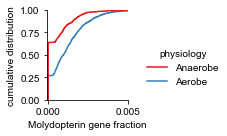

In [29]:
#figure = plt.figure()
sns.displot(x='mo_gene_fraction',data=df2,hue='physiology',kind="ecdf",palette='Set1',aspect=1,height=2)
plt.xlabel('Molydopterin gene fraction')
plt.ylabel('cumulative distribution')
plt.xlim([-0.0001,0.005])
plt.savefig('ecdf.molydopterin.geneFrac.24Nov2022.small.svg')

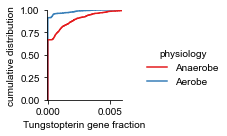

In [28]:
#figure = plt.figure()
sns.displot(x='w_gene_fraction',data=df2,hue='physiology',kind="ecdf",palette='Set1',aspect=1,height=2)
plt.xlabel('Tungstopterin gene fraction')
plt.ylabel('cumulative distribution')
plt.xlim([-0.0001,0.006])
plt.savefig('ecdf.tungstodopterin.geneFrac.24Nov2022.small.svg')

In [186]:
dfs = []
for idx,row in df2.iterrows():
    kolist = list(eval(row.gene_dict).values())
    k = list(set(kolist))
    g = pd.DataFrame({"KO":k,'counts': [kolist.count(x) for x in list(set(k))]})
    g['counts_n'] = g.counts / row.total_annot_genes
    g['genome'] = row.genome
    dfs.append(g)
dfs_genome_kegg_counts = pd.concat(dfs,axis=0)
dfg = dfs_genome_kegg_counts.pivot_table(index="genome",columns='KO',values='counts').fillna(0)


In [285]:
import cbtk.kegg as kegg_api
kos = kegg_api.list('ko')
kos.columns = ['KO','name']
kos['KO'] = kos['KO'].apply(lambda x: x.split(':')[1])
kos['gene_name'] = kos["name"].apply(lambda x: x.split(";")[0])
kos.to_csv("keggGeneNames.csv")

In [212]:
dfgc = dfs_genome_kegg_counts.pivot_table(index="genome",columns='KO',values='counts_n').fillna(0)


In [235]:
#
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [236]:

# perform tests for volcano plot
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

X = dfgc.join(df2.set_index("genome")[["physiology"]]).set_index('physiology')
ustats,pvals = mannwhitneyu(X.loc['Aerobe'],X.loc['Anaerobe'])
lfc = np.log2((X.loc['Aerobe'].mean() + 1e-6) / (X.loc['Anaerobe'].mean()+ 1e-6))
reject,adjpval,alphacSidak,alphacBonf =  multipletests(pvals,method="fdr_bh")
stat_results = pd.DataFrame({'KO': list(X),'ustat': ustats ,'pval': pvals, 'FoldChange (log2)': lfc, 'p-val (adj)': adjpval})
stat_results["q-val (log10)"]= stat_results["p-val (adj)"].apply(lambda x: -np.log10(x))
stat_results = stat_results.join(kos.set_index('KO'))
stat_results["genes"] = stat_results["gene_name"].apply(lambda x: x.replace(', ','/'))

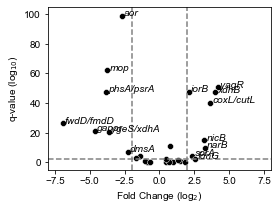

In [324]:
plt.figure(figsize=(4,3))
ax = sns.scatterplot(x="FoldChange (log2)",y="q-val (log10)",data=stat_results,color="k")
#plt.hlines()
fccutoff = 2
qcutoff = -np.log10(0.01)
trans = 0.15
for i, row in stat_results.iterrows():
    if ((abs(row['FoldChange (log2)']) > fccutoff) &  ((row['q-val (log10)']) > qcutoff)):
        ax.annotate(row.genes, (row["FoldChange (log2)"]+trans,row["q-val (log10)"]+trans),style='italic')
plt.hlines(qcutoff,-8,8,color='grey',linestyles="dashed")
plt.xlim([-8,8])
#plt.vlines(0,-5,105,color='grey',linestyles="dashed")
plt.vlines(fccutoff,-5,105,color='grey',linestyles="dashed")
plt.vlines(-fccutoff,-5,105,color='grey',linestyles="dashed")
plt.ylim([-5,105])
plt.xlabel('Fold Change (log$_2$)')
plt.ylabel('q-value (log$_{10}$)')
plt.savefig("aerobe_vs_anaerobe.pterins.svg")

In [59]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca  = PCA(n_components=2)


In [206]:
scaler = StandardScaler() 
xn = scaler.fit_transform(dfg.values)
#xn = dfg.apply(lambda x: np.log2(x+(1/10000))).values
pca.fit(xn)
labels = ["PC{i}: ({x}%)".format(i=x[0],x=round(100*x[1],2)) for x in list(zip(range(1,n+1),pca.explained_variance_ratio_))]
pdfg = pd.DataFrame(pca.transform(xn),index=dfg.index,columns =labels)

In [341]:
pdfg

,PC1: (8.94%),PC2: (6.11%)
genome,,
GB_GCA_000010565.1,-2.871314,0.247552
GB_GCA_000016605.1,-0.802124,-0.893222
GB_GCA_000018565.1,-0.898734,-0.589625
GB_GCA_000024525.1,1.912505,-1.661146
GB_GCA_000026125.1,0.784867,0.319930
...,...,...
RS_GCF_904846225.1,-0.315383,-0.630531
RS_GCF_904846235.1,0.274022,-0.591057
RS_GCF_904846285.1,-0.088211,-0.162783


In [342]:
pdfg = pdfg.join(df2.set_index('genome')).join(dfg)

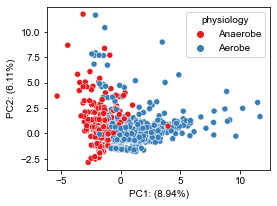

In [344]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=labels[0],y=labels[1],data=pdfg,hue='physiology',palette='Set1')
plt.savefig("PCAplot.svg")